<a href="https://colab.research.google.com/github/its-rajesh/Deep-Learning/blob/main/SimpleClassificationTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digits Classification Task**

## **Processing Inputs**

In [19]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [20]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [21]:
def read_data(path):
    
    train_path = path+"/train"
    test_path = path+"/test"
    validation_path = path+"/val"
    
    tr_data, test_data, val_data = [], [], []
    tr_out, test_out, val_out = [], [], []

    for i in os.listdir(train_path):

        if i != ".DS_Store":
            for j in os.listdir(train_path+"/"+i):
                tr_data.append(cv2.imread(train_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
                tr_out.append(i)

            for j in os.listdir(test_path+"/"+i):
                test_data.append(cv2.imread(test_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
                test_out.append(i)

            for j in os.listdir(validation_path+"/"+i):
                val_data.append(cv2.imread(validation_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
                val_out.append(i)
                
                
    tr_data, test_data, val_data = np.array(tr_data), np.array(test_data), np.array(val_data)
    tr_out, test_out, val_out = np.array(list(map(int, tr_out))), np.array(list(map(int, test_out))), np.array(list(map(int, val_out)))

    return tr_data, test_data, val_data, tr_out, test_out, val_out

In [ ]:
def convert(data):
  out = []
  for i in data:
    if i == 1:
      out.append(0)
    if i == 4:
      out.append(1)
    if i == 7:
      out.append(2)
    if i == 8:
      out.append(3)
    if i == 9:
      out.append(4)

  return np.array(out)

In [35]:
path = "/drive/My Drive/Others/Optimizers/"
tr_data, test_data, val_data, tr_out, test_out, val_out = read_data(path)

In [52]:
tr_label = convert(tr_out)
val_label = convert(val_out)
test_label = convert(test_out)

## **Deep Learning Model**

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
inputs = Input(shape=(28, 28))

x = Flatten(input_shape=(28, 28), name='Input_Layer')(inputs)
x = Dense(512, activation='sigmoid', name='HiddenLayer1')(x)
x = Dense(256, activation='sigmoid', name='HiddenLayer2')(x)
x = Dense(128, activation='sigmoid', name='HiddenLayer3')(x)

outputs = Dense(5, activation='softmax', name='OutputLayer')(x)

model = Model(inputs=inputs, outputs=outputs)

In [25]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 512)               401920    
                                                                 
 HiddenLayer2 (Dense)        (None, 256)               131328    
                                                                 
 HiddenLayer3 (Dense)        (None, 128)               32896     
                                                                 
 OutputLayer (Dense)         (None, 5)                 645       
                                                                 
Total params: 566,789
Trainable params: 566,789
Non-trainab

In [26]:
optimizer = SGD(learning_rate=0.001, momentum=0.0,name='SGD')

In [27]:
model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
callback = EarlyStopping(monitor='loss',min_delta=0.0001,patience=2)


In [53]:
model_fit = model.fit(tr_data, tr_label, epochs=100, batch_size=1, callbacks=callback)

Epoch 1/10000
11385/11385 [==============================] - 31s 3ms/step - loss: 0.9060 - accuracy: 0.8020
Epoch 2/10000
11385/11385 [==============================] - 33s 3ms/step - loss: 0.3729 - accuracy: 0.9147
Epoch 3/10000
11385/11385 [==============================] - 30s 3ms/step - loss: 0.2482 - accuracy: 0.9343
Epoch 4/10000
11385/11385 [==============================] - 38s 3ms/step - loss: 0.2067 - accuracy: 0.9425
Epoch 5/10000
11385/11385 [==============================] - 33s 3ms/step - loss: 0.1855 - accuracy: 0.9488
Epoch 6/10000
11385/11385 [==============================] - 50s 4ms/step - loss: 0.1742 - accuracy: 0.9507
Epoch 7/10000
11385/11385 [==============================] - 39s 3ms/step - loss: 0.1591 - accuracy: 0.9543
Epoch 8/10000
11385/11385 [==============================] - 36s 3ms/step - loss: 0.1517 - accuracy: 0.9563
Epoch 9/10000
11385/11385 [==============================] - 36s 3ms/step - loss: 0.1460 - accuracy: 0.9570
Epoch 10/10000
11385/11385 [

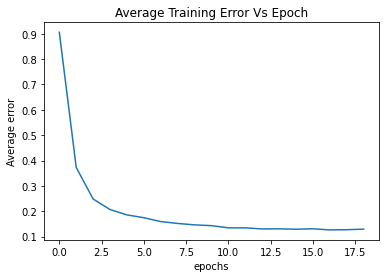

In [54]:
plt.plot(model_fit.history['loss'])
plt.title("Average Training Error Vs Epoch")
plt.xlabel("epochs")
plt.ylabel("Average error")
plt.show()

In [55]:
loss, mse = model.evaluate(test_data, test_label)

120/120 [==============================] - 1s 3ms/step - loss: 0.1414 - accuracy: 0.9579


In [56]:
predictions = model.predict(test_data, verbose=1)
p_class = np.argmax(predictions, axis=1)
cm = tf.math.confusion_matrix(test_label, p_class)
cm

120/120 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[749,   0,   3,   6,   1],
       [  1, 732,   1,   3,  22],
       [  5,  14, 737,   0,  12],
       [  4,   9,   2, 729,  15],
       [  3,  22,  26,  12, 716]], dtype=int32)>